## Data understanding - Seatle AirBnB

In [1]:
#Importing standard liabraries for data exploration

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Uploading AirBnB data sets

calendar_df = pd.read_csv('calendar.csv')

listing_df = pd.read_csv('listings.csv')

reviews_df = pd.read_csv('reviews.csv')

In [3]:
# Rows with some of the missing values

no_nulls_listing = set(listing_df.columns[listing_df.isnull().mean()==0])

print(no_nulls_listing)

{'instant_bookable', 'extra_people', 'availability_30', 'availability_365', 'availability_90', 'price', 'id', 'neighbourhood_group_cleansed', 'cancellation_policy', 'require_guest_phone_verification', 'room_type', 'calculated_host_listings_count', 'jurisdiction_names', 'last_scraped', 'street', 'host_url', 'amenities', 'minimum_nights', 'host_id', 'is_location_exact', 'listing_url', 'calendar_last_scraped', 'city', 'bed_type', 'longitude', 'latitude', 'country_code', 'country', 'guests_included', 'state', 'has_availability', 'require_guest_profile_picture', 'smart_location', 'host_verifications', 'accommodates', 'number_of_reviews', 'picture_url', 'market', 'neighbourhood_cleansed', 'experiences_offered', 'calendar_updated', 'scrape_id', 'requires_license', 'name', 'description', 'maximum_nights', 'availability_60'}


In [4]:
# why some of the numeric vlaues are missing for host?

listing_df[['host_response_time','host_response_rate','host_acceptance_rate']].head(5)

,host_response_time,host_response_rate,host_acceptance_rate
0,within a few hours,96%,100%
1,within an hour,98%,100%
2,within a few hours,67%,100%
3,NaN,NaN,NaN
4,within an hour,100%,NaN


__follow up on host rating__

- convert response_rate and acceptance_rate into numeric values

In [5]:
# converting object % to float

def percentage_to_float(x):
        return float(x.strip('%')) / 100

In [6]:
# Converting response_rate and acceptance_rate into numeric values

listing_df['host_response_rate'] = listing_df['host_response_rate'].fillna('0%').apply(percentage_to_float)

listing_df['host_acceptance_rate'] = listing_df['host_acceptance_rate'].fillna('0%').apply(percentage_to_float)

In [7]:
# why some of the numeric vlaues are missing for price, fee and deposit?

listing_df[['price','weekly_price','monthly_price','security_deposit','cleaning_fee']].head(5)

,price,weekly_price,monthly_price,security_deposit,cleaning_fee
0,$85.00,NaN,NaN,NaN,NaN
1,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00
2,$975.00,NaN,NaN,"$1,000.00",$300.00
3,$100.00,$650.00,"$2,300.00",NaN,NaN
4,$450.00,NaN,NaN,$700.00,$125.00


In [8]:
# converting financials to float

def financial_to_float(x):
        x = x.replace(",", "")
        return float(x.strip('$'))

In [9]:
# Converting response_rate and acceptance_rate into numeric values

financials = ['price','weekly_price','monthly_price','security_deposit','cleaning_fee']

for i in financials:
    listing_df[i] = listing_df[i].fillna('$0').apply(financial_to_float)

In [10]:
# Checking results

listing_df[['price','weekly_price','monthly_price','security_deposit','cleaning_fee']].head(5)

,price,weekly_price,monthly_price,security_deposit,cleaning_fee
0,85.0,0.0,0.0,0.0,0.0
1,150.0,1000.0,3000.0,100.0,40.0
2,975.0,0.0,0.0,1000.0,300.0
3,100.0,650.0,2300.0,0.0,0.0
4,450.0,0.0,0.0,700.0,125.0


In [11]:
# Splitting for numeric and categorical variables

cat_listing_df = listing_df.select_dtypes(include=['object'])

var_listing_df = listing_df.select_dtypes(include=np.number)

In [15]:
set(cat_listing_df.columns)

{'amenities',
 'bed_type',
 'calendar_last_scraped',
 'calendar_updated',
 'cancellation_policy',
 'city',
 'country',
 'country_code',
 'description',
 'experiences_offered',
 'extra_people',
 'first_review',
 'has_availability',
 'host_about',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_is_superhost',
 'host_location',
 'host_name',
 'host_neighbourhood',
 'host_picture_url',
 'host_response_time',
 'host_since',
 'host_thumbnail_url',
 'host_url',
 'host_verifications',
 'instant_bookable',
 'is_location_exact',
 'jurisdiction_names',
 'last_review',
 'last_scraped',
 'listing_url',
 'market',
 'medium_url',
 'name',
 'neighborhood_overview',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'notes',
 'picture_url',
 'property_type',
 'require_guest_phone_verification',
 'require_guest_profile_picture',
 'requires_license',
 'room_type',
 'smart_location',
 'space',
 'state',
 'street',
 'summary',
 'thumbnail_url',
 'transit',
 'xl_pictur

In [12]:
# Looking into correlation between numeric variables. Removing irrelevant columns

listing_corr_clean = var_listing_df.drop(columns=['id','scrape_id','host_id','latitude',
                                                'longitude','license','host_listings_count',
                                               'calculated_host_listings_count',
                                               'host_total_listings_count'])

<AxesSubplot:>

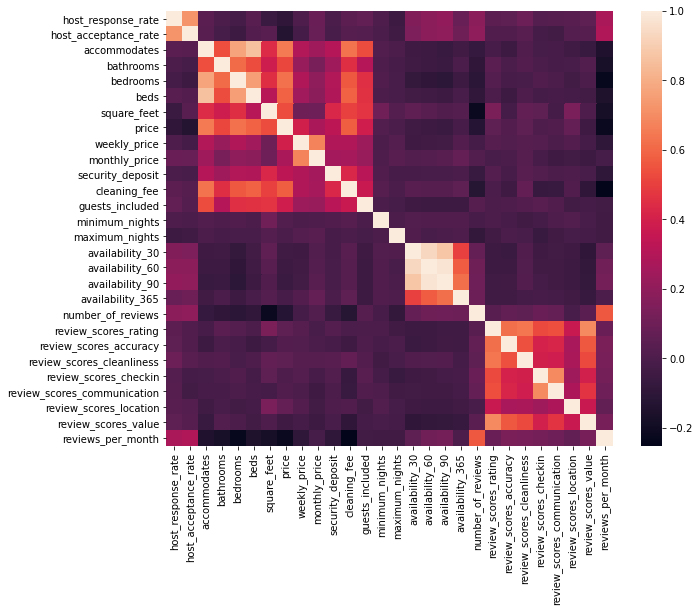

In [13]:
# Correlation heatmap

plt.subplots(figsize=(10,8))
sns.heatmap(listing_corr_clean.corr())

### Looking into listings correlations

__Host rate__

- host_response_rate
- host_acceptance_rate

interesting that response rate and acceptance rate are highly correlated: could be the case that hosts who response with their prospects are more likely accept their requests?

__Size of a property__

- accomadates
- bathrooms
- bedrooms
- beds
- guests included 
- square feet

potentially we can keep only: beds and square feet as these are the least correlated features and can compliment each other.

__Availability__

- availability_30
- availability_60
- availability_90
- availability_365

Interesting observation: all 30,60 & 90 days are highly correlated which tells potentially indicated that popular properties are always booked and less poppular are more likely to be available

__Reviews__

- review_scores_rating
- review_scores_accuracy
- review_scores_cleanliness
- review_scores_checkin
- review_scores_communication
- review_scores_location
- review_scores_value 

potentially we can keep: review_scores_rating, review_scores_location and review_per_month as these are less corelated

In [15]:
# calculating % of missing data

most_missing_cols = set(listing_df.columns[listing_df.isnull().mean() > 0.75])

half_missing_cols = set(listing_df.columns[listing_df.isnull().mean() > 0.5])

thirty_percent_missing_cols = set(listing_df.columns[listing_df.isnull().mean() > 0.3])

ten_percent_missing_cols = set(listing_df.columns[listing_df.isnull().mean() > 0.1])

print(most_missing_cols, '75% missing')

print(half_missing_cols, '50% missing')

print(thirty_percent_missing_cols, '30% missing')

print(ten_percent_missing_cols, '10% missing')

{'square_feet', 'license'} 75% missing
{'square_feet', 'license'} 50% missing
{'square_feet', 'notes', 'license'} 30% missing
{'space', 'transit', 'square_feet', 'review_scores_communication', 'host_response_time', 'host_about', 'notes', 'neighborhood_overview', 'first_review', 'review_scores_accuracy', 'last_review', 'license', 'reviews_per_month', 'review_scores_checkin', 'neighbourhood', 'review_scores_location', 'review_scores_rating', 'review_scores_value', 'review_scores_cleanliness'} 10% missing


## Looking into missing values of listings

Luckily for us there are few values missing that we've shorlisted for main question of price prediction:

- square_feet - with at least 30% missing

- review_scores_rating, review_scores_location, reviews_per_month with at least 10% missing. 

Reviews missing are likely to be new properties with few ranking - these could be candidates for imputing. 

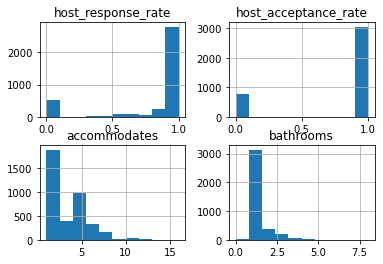

In [16]:
# Looking into distributions
listing_corr_clean.iloc[:, :4].hist();

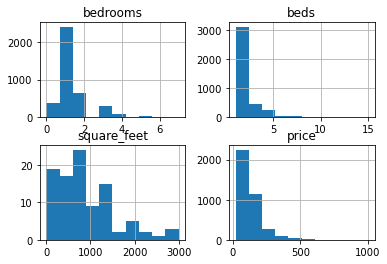

In [17]:
listing_corr_clean.iloc[:, 4:8].hist();

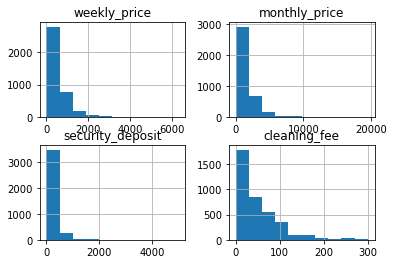

In [18]:
listing_corr_clean.iloc[:, 8:12].hist();

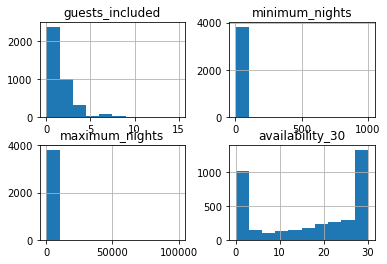

In [19]:
listing_corr_clean.iloc[:, 12:16].hist();

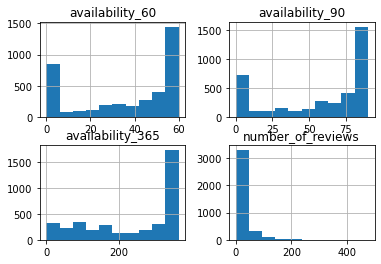

In [20]:
listing_corr_clean.iloc[:, 16:20].hist();

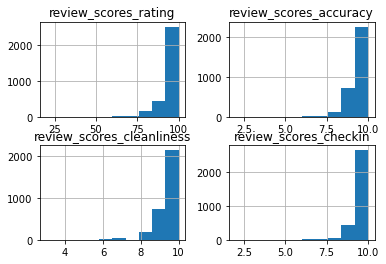

In [21]:
listing_corr_clean.iloc[:, 20:24].hist();

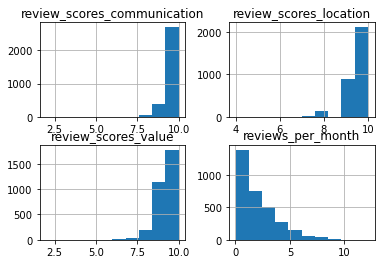

In [22]:
listing_corr_clean.iloc[:, 24:30].hist();
# we can't have histogram for cat values

In [23]:
calendar_df.head(5)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


### What is the busiest time of the year for Seattle?

In order to answer our first question we don't really need to build a sophisticated model but rather we can take a closer look into calendar data.

In [24]:
# Let's convert dates into month to identtify the busiest time of the year

import datetime as dt

calendar_df['date'] = pd.to_datetime(calendar_df['date'], format='%Y-%m-%d')

calendar_df['month'] = calendar_df['date'].dt.month
calendar_df['year'] = calendar_df['date'].dt.year

calendar_df.head(10)

,listing_id,date,available,price,month,year
0,241032,2016-01-04,t,$85.00,1,2016
1,241032,2016-01-05,t,$85.00,1,2016
2,241032,2016-01-06,f,NaN,1,2016
3,241032,2016-01-07,f,NaN,1,2016
4,241032,2016-01-08,f,NaN,1,2016
5,241032,2016-01-09,f,NaN,1,2016
6,241032,2016-01-10,f,NaN,1,2016
7,241032,2016-01-11,f,NaN,1,2016
8,241032,2016-01-12,f,NaN,1,2016
9,241032,2016-01-13,t,$85.00,1,2016


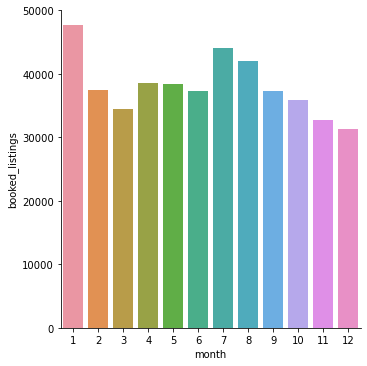

In [25]:
# We will focus only on year 2016 since we have only a single full year of data 
# Below we will look into total number of days per month booked across all properties in the Seatle

monthly_booked = calendar_df[(calendar_df['available']== 'f') & (calendar_df['year']== 2016)][['listing_id','month']].groupby(['month']).count()

monthly_booked = monthly_booked.reset_index()

monthly_booked.rename(columns={"listing_id": "booked_listings"}, inplace = True)

sns.catplot (x = 'month', y = 'booked_listings', data = monthly_booked , kind = 'bar')

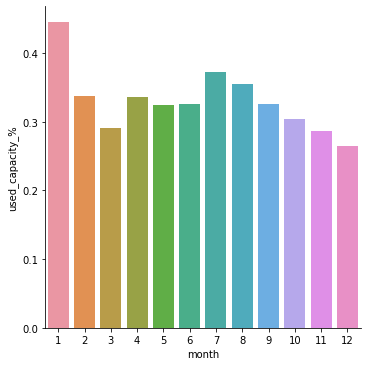

In [26]:
# Let's look into percentage of booked properties by month
# we can simply do it by dividing total 

capacity = calendar_df[calendar_df['year']== 2016][['listing_id','month']].groupby(['month']).count()

capacity = capacity.reset_index()

capacity.rename(columns={"listing_id": "total_listings"}, inplace = True)

capacity = capacity.merge(monthly_booked, left_on='month', right_on='month')

capacity['used_capacity_%'] = capacity['booked_listings'] / capacity['total_listings']

sns.catplot (x = 'month', y = 'used_capacity_%', data = capacity , kind = 'bar')

## What are the most expensive neighbourhoods ?

As with busiest time question we don't really need to build a model we will simply do minor data manipulations

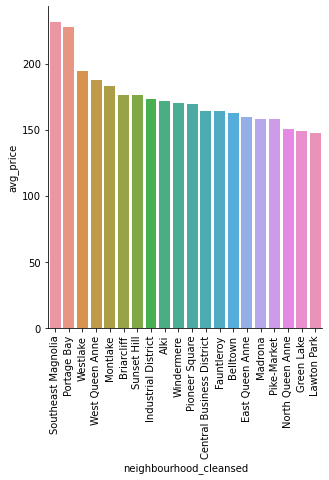

In [27]:
# Let's focus on neighbourhood_cleansed as this is neigbourhood row shows the most detailed description, 
# it also does not have any missing values.

avg_neighbourhood_price = listing_df[['neighbourhood_cleansed','price']].groupby('neighbourhood_cleansed').mean().reset_index()

# Let's take a look at top 20 most expensive neighbourhoods

top_20_neighbourhoods = avg_neighbourhood_price.nlargest(20, 'price', keep='first')

top_20_neighbourhoods.rename(columns={"price": "avg_price"}, inplace = True)

sns.catplot (x = 'neighbourhood_cleansed', y = 'avg_price', data = top_20_neighbourhoods , kind = 'bar')
plt.xticks(rotation=90);